In [1]:
import pandas as pd

### Generation and Inference

In [3]:
import transformers
import sdgeval.generation.controllable.argument_utils as argument_utils
from sdgeval.generation.controllable.inference import inference
from sdgeval.generation.controllable.train_generator import train
from sdgeval.generation.controllable.testing_args import set_default_training_args, set_default_config_args

#### Training the model to generate the synthetic data

In [4]:
if __name__ == "__main__":
    train_args = set_default_training_args(dry_run=True)
    
    model_args, data_args = set_default_config_args()
    privacy_args, lora_args= argument_utils.PrivacyArguments(), argument_utils.LoraArguments()
    privacy_args.disable_dp = True
    data_args.dataset_name = 'wiki'
    data_args.path_to_dataset = '/data/datasets/wikipedia-biographies-v1-post-2020->-200.csv'
    model_args.path_to_save_model = 'dummy-test'
    #data_args.prompt_begin = "Label: "
    #data_args.prompt_end = " "
    
    train(argument_utils.Arguments(train=train_args, privacy=privacy_args, model=model_args, data = data_args, lora=lora_args))

/home/kramesh3/.local/lib/python3.9/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
02/25/2025 14:55:50:WARNING:--dry_run was specified. Reducing number of training steps to 2 and logging intervals to 1...
02/25/2025 14:55:50:WARNING:Process rank: 0, device: cuda:0, n_gpu: 6, distributed training: True, 16-bits training: False


CPU:  0.0
Model:  princeton-nlp/Sheared-LLaMA-1.3B


[WARNING|logging.py:328] 2025-02-25 14:55:54,630 >> You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
02/25/2025 14:55:56:WARNING:Using the latest cached version of the module from /home/kramesh3/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--rouge/b01e0accf3bd6dd24839b769a5fda24e14995071570870922c71970b3a6ed886 (last modified on Fri Feb  2 20:35:49 2024) since it couldn't be found locally at evaluate-metric--rouge, or remotely on the Hugging Face Hub.


Data saved to dummy-test_data/
Train: 278 samples, Validation: 35 samples, Test: 35 samples
Length of the training set: 278
Length of the validation set: 35
Length of the test set : 35
1572864
Differentially Private Training: False


[WARNING|trainer.py:617] 2025-02-25 14:56:00,483 >> max_steps is given, it will override any value given in num_train_epochs
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: kramesh-tlw (kramesh-tlw-johns-hopkins-university). Use `wandb login --relogin` to force relogin


/data/kramesh3/envs/sdg-env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'loss': 1.9882, 'learning_rate': 0.0003, 'epoch': 0.08333333333333333}
{'loss': 1.9991, 'learning_rate': 0.0003, 'epoch': 0.16666666666666666}


/data/kramesh3/envs/sdg-env/lib/python3.9/site-packages/peft/utils/save_and_load.py:160: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


{'train_runtime': 10.7472, 'train_samples_per_second': 4.466, 'train_steps_per_second': 0.186, 'train_loss': 1.9936314821243286, 'epoch': 0.16666666666666666}


/data/kramesh3/envs/sdg-env/lib/python3.9/site-packages/peft/utils/save_and_load.py:160: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


#### Performing inference in order to generate the synthetic data 

In [5]:
if __name__ == "__main__":
    train_args = set_default_training_args(dry_run=False, dry_test_run = True)
    
    model_args, data_args = set_default_config_args()
    privacy_args, lora_args= argument_utils.PrivacyArguments(), argument_utils.LoraArguments()
    model_args.inference = True
    privacy_args.disable_dp = True
    data_args.dataset_name = 'wiki'
    data_args.path_to_test_dataset = 'dummy-test_data/test.csv'
    model_args.path_to_load_model = 'dummy-test'
    model_args.num_return_seq = 5
    #data_args.prompt_begin = "Label: "
    #data_args.prompt_end = " "
    
    inference(argument_utils.Arguments(train=train_args, privacy=privacy_args, model=model_args, data = data_args, lora=lora_args))

/home/kramesh3/.local/lib/python3.9/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


0
CPU:  0.1
Model:  princeton-nlp/Sheared-LLaMA-1.3B


02/25/2025 14:57:17:WARNING:Using the latest cached version of the module from /home/kramesh3/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--rouge/b01e0accf3bd6dd24839b769a5fda24e14995071570870922c71970b3a6ed886 (last modified on Fri Feb  2 20:35:49 2024) since it couldn't be found locally at evaluate-metric--rouge, or remotely on the Hugging Face Hub.


Using LoRA
Total number of parameters of the model: 1347000320
Fine-tuned number of parameters of the model: 0
Differentially Private Training: False
Non-DP model has been loaded...
Testing for the entire dataset. Number of generations per prompt:  5
{'Unnamed: 0': [163, 163, 163, 163, 163, 255, 255, 255, 255, 255, 322, 322, 322, 322, 322, 167, 167, 167, 167, 167, 237, 237, 237, 237, 237], 'Name': ['Liza Hanim', 'Liza Hanim', 'Liza Hanim', 'Liza Hanim', 'Liza Hanim', 'Nathan Peabody Ames', 'Nathan Peabody Ames', 'Nathan Peabody Ames', 'Nathan Peabody Ames', 'Nathan Peabody Ames', 'Ghib Ojisan', 'Ghib Ojisan', 'Ghib Ojisan', 'Ghib Ojisan', 'Ghib Ojisan', 'Blanche Pritchard McCrum', 'Blanche Pritchard McCrum', 'Blanche Pritchard McCrum', 'Blanche Pritchard McCrum', 'Blanche Pritchard McCrum', 'Max Gerlach', 'Max Gerlach', 'Max Gerlach', 'Max Gerlach', 'Max Gerlach'], '__index_level_0__': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]}
Length of test data 5


[WARNING|logging.py:313] 2025-02-25 14:57:23,608 >> You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
[WARNING|logging.py:328] 2025-02-25 14:57:23,638 >> Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Saving results to file...


### Descriptive analysis of the synthetic data

In [ ]:
import pandas as pd
import nltk
from sdgeval.descriptive.descriptor import TextDescriptor
from sdgeval.descriptive.arguments import TextDescriptorArgs
nltk.download('punkt_tab')

In [6]:
df = pd.read_csv('test-outputs.csv')
data = {'texts': df['output_text'].tolist()[:10]}

[nltk_data] Downloading package punkt to /home/kramesh3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most frequent entities: [('Nathan Peabody Ames', 17), ('Liza Hanim', 9), ('first', 8), ('American', 8), ('Boston', 6), ('Massachusetts', 6), ('East Germany', 5), ('1945', 5), ('Nathan', 5), ('Hanim', 4)]
Least frequent entities: {'30 May 1940': 1, 'Islamism': 1, 'Islamic': 1, 'the Arab Spring': 1, 'the Middle East': 1, 'Jewish': 1, 'the Faculty of Philosophy and Literature': 1, 'the University of Istanbul': 1, '1958': 1, "the Istanbul Prosecutor's Office": 1, '1972 to 1975': 1, "Master's Degree": 1, 'Ege University': 1, 'Turkey': 1, 'the United States': 1, 'the New York Review of Books': 1, 'Newsweek': 1, 'the 1980s': 1, 'East London': 1, 'Toxteth': 1, 'Bangladeshi': 1, '4th': 1, 'November 1954': 1, 'Muhammad Hussain': 1, '1982': 1, 'Muhammad Ali': 1, 'Mohammad Ali': 1, 'Rs': 1, '500,000': 1, 'Mohammad Rashid': 1, 'London': 1, 'Liza Hanim Biography': 1, 'Moussa Hanim': 1, 'Tawana Kandola': 1, 'Moussa': 1, 'RN': 1, 'Tawana': 1, "Liza Hanim Biography - Liza Hanim's": 1, '2016': 1, 'Liza 

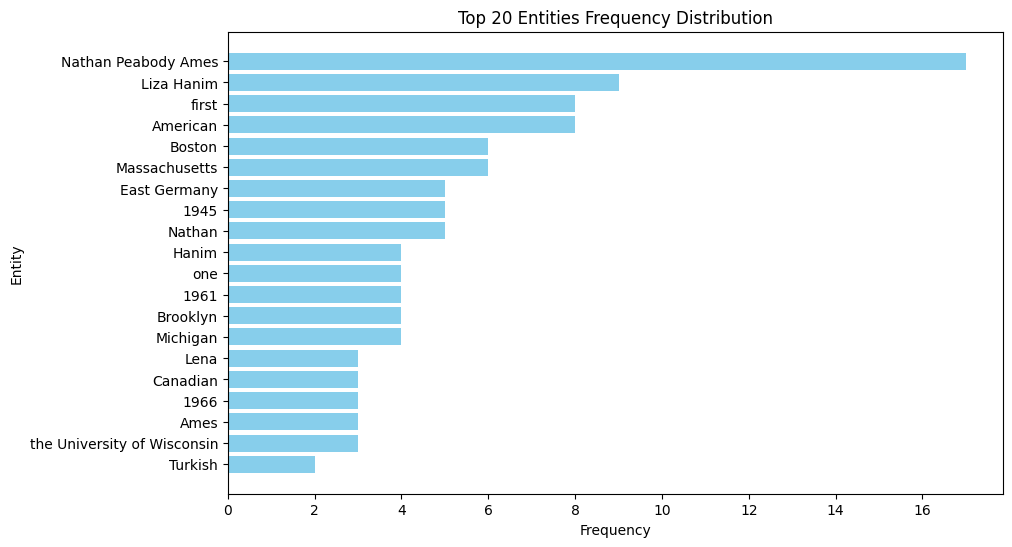

In [ ]:
desc_analyze = TextDescriptor(data['texts'], TextDescriptorArgs(produce_plot=True))
desc_analyze.analyze_entities()

In [8]:
print(desc_analyze._topic_modeling())
print(desc_analyze._compute_tfidf())
print(desc_analyze._ngram_frequency())

[(0, '0.042*"in" + 0.036*"." + 0.033*"," + 0.030*"and" + 0.027*"her"'), (1, '0.058*"," + 0.048*"the" + 0.033*"." + 0.032*"and" + 0.032*"a"'), (2, '0.002*"," + 0.002*"the" + 0.002*"in" + 0.002*"was" + 0.002*"of"')]
(array(['000', '03', '06', '100', '11', '115', '12', '17', '1821', '1822',
       '1833', '1840', '1845', '1864', '1866', '1868', '1876', '1878',
       '1879', '1888', '1891', '1893', '1897', '1898', '1903', '1906',
       '1908', '1912', '1940', '1945', '1954', '1958', '1961', '1963',
       '1965', '1966', '1972', '1975', '1977', '1980s', '1982', '1996',
       '20', '2016', '20th', '22', '28', '30', '4th', '500', '51',
       'about', 'academic', 'across', 'acting', 'actress', 'adams',
       'advertisements', 'affair', 'african', 'after', 'again', 'age',
       'aired', 'ali', 'allowed', 'almanac', 'also', 'always',
       'ambassador', 'american', 'americans', 'ames', 'amherst', 'among',
       'amount', 'an', 'ancient', 'and', 'animal', 'animals', 'animated',
       'a

In [9]:
from sdgeval.utils.utils import create_classification_dataset

df = pd.read_csv('test-outputs.csv')
_, _, _ = create_classification_dataset(df, label_column = 'Name', output_json_path = 'dummy-mapping.json',
                                        output_dir = 'downstream-dummy-test', multilabel = False, train_ratio = 0.7, test_ratio = 0.15, val_ratio = 0.15)
#df = pd.read_csv('test-outputs.csv')
#df, _ = encode_labels(df, label_column='Name', output_json_path = 'dummy-mapping.json')
#_, _, _ = split_and_save_dataframe(df, 'downstream-dummy-test', train_ratio = 0.7, test_ratio = 0.15, val_ratio=0.15)

Data saved to downstream-dummy-test
Train: 17 samples, Validation: 4 samples, Test: 4 samples


### Training and testing a downstream classifier

#### Training a downstream classifier

In [11]:
from transformers import TrainingArguments as HfTrainingArguments
from sdgeval.downstream.classify.train_classifier import TrainingArguments, ModelArguments, Classifier, Arguments

if __name__ == "__main__":
        #arg_parser = transformers.HfArgumentParser((TrainingArguments, MiscArguments))
        #train_args, model_args = arg_parser.parse_args_into_dataclasses()
        train_args = TrainingArguments()
        model_args = ModelArguments()
        model_args.is_train = True
        model_args.text_field = 'output_text'
        model_args.label_field = 'Label'
        #model_args.path_to_dataset = '/home/kramesh3/sdgeval/data/benchmark/baseline_downstream_data_10ICD/'
        model_args.path_to_dataset = '/home/kramesh3/sdgeval/downstream-dummy-test'
        model_args.n_labels = 5
        model_args.problem_type = 'single_label_classification'
        #model_args.problem_type = "multi_label_classification"
        args = Arguments(train=train_args, model=model_args)
        print("Initialization...")
        if(args.model.is_train):
          print("Training:\n")
          obj = Classifier(args = args)
          obj.finetune_model()
        if(args.model.is_test):
          print("Testing:\n")
          obj = Classifier(args = args)
          obj.test_model()

/home/kramesh3/.local/lib/python3.9/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
[WARNING|integration_utils.py:100] 2025-02-25 14:58:12,051 >> Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Initialization...
Training:

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0.1', 'Unnamed: 0', 'Name', '__index_level_0__', 'input_prompt', 'output_text', 'Label'],
        num_rows: 17
    })
    validation: Dataset({
        features: ['Unnamed: 0.1', 'Unnamed: 0', 'Name', '__index_level_0__', 'input_prompt', 'output_text', 'Label'],
        num_rows: 4
    })
    test: Dataset({
        features: ['Unnamed: 0.1', 'Unnamed: 0', 'Name', '__index_level_0__', 'input_prompt', 'output_text', 'Label'],
        num_rows: 4
    })
})
Successfully loaded dataset '/home/kramesh3/sdgeval/downstream-dummy-test' from Hugging Face Hub.
Loading base model for fine-tuning...


[WARNING|modeling_utils.py:4576] 2025-02-25 14:58:12,319 >> Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Preprocessing dataset!


/home/kramesh3/.local/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2829: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Model training begins!


/data/kramesh3/envs/sdg-env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.652247,0.000000,0.000000,0.000000,0.000000
2,No log,1.621177,0.000000,0.000000,0.000000,0.000000
3,No log,1.599137,0.000000,0.000000,0.000000,0.000000


/home/kramesh3/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kramesh3/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/kramesh3/envs/sdg-env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/home/kramesh3/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning

#### Testing the downstream classifier

In [14]:
from transformers import TrainingArguments as HfTrainingArguments
from sdgeval.downstream.classify.train_classifier import TrainingArguments, ModelArguments, Classifier, Arguments

if __name__ == "__main__":
        #arg_parser = transformers.HfArgumentParser((TrainingArguments, MiscArguments))
        #train_args, model_args = arg_parser.parse_args_into_dataclasses()
        train_args = TrainingArguments()
        model_args = ModelArguments()
        model_args.is_train = False
        model_args.is_test = True
        model_args.text_field = 'output_text'
        model_args.label_field = 'Label'
        model_args.path_to_model = '/home/kramesh3/sdgeval/temp-classifier'
        model_args.path_to_dataset = '/home/kramesh3/sdgeval/downstream-dummy-test'
        model_args.n_labels = 5
        model_args.problem_type = "single_label_classification"
        model_args.retain_columns = ['Name', 'input_prompt']
        #model_args.retain_columns = ['ICD9_CODE', 'LONG_TITLE']
        args = Arguments(train=train_args, model=model_args)
        print("Initialization...")
        if(args.model.is_train):
          print("Training:\n")
          obj = Classifier(args = args)
          obj.finetune_model()
        if(args.model.is_test):
          print("Testing:\n")
          obj = Classifier(args = args)
          obj.test_model()

[WARNING|integration_utils.py:100] 2025-02-25 15:00:08,269 >> Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Initialization...
Testing:

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0.1', 'Unnamed: 0', 'Name', '__index_level_0__', 'input_prompt', 'output_text', 'Label'],
        num_rows: 17
    })
    validation: Dataset({
        features: ['Unnamed: 0.1', 'Unnamed: 0', 'Name', '__index_level_0__', 'input_prompt', 'output_text', 'Label'],
        num_rows: 4
    })
    test: Dataset({
        features: ['Unnamed: 0.1', 'Unnamed: 0', 'Name', '__index_level_0__', 'input_prompt', 'output_text', 'Label'],
        num_rows: 4
    })
})
Successfully loaded dataset '/home/kramesh3/sdgeval/downstream-dummy-test' from Hugging Face Hub.
Checkpoint exists:  /home/kramesh3/sdgeval/temp-classifier 
Loading model from the checkpoint...
Preprocessing dataset
Model evaluation begins...


/home/kramesh3/.local/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2829: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/data/kramesh3/envs/sdg-env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Saving file!
Evaluation results: {'eval_loss': 1.496679663658142, 'eval_precision': 0.16666666666666666, 'eval_recall': 0.25, 'eval_f1': 0.2, 'eval_accuracy': 0.5, 'eval_runtime': 0.0764, 'eval_samples_per_second': 52.364, 'eval_steps_per_second': 13.091}


/home/kramesh3/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kramesh3/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Fairness audit over the test results

In [15]:
from sdgeval.fairness.metrics import analyze_group_fairness_performance
import pandas as pd
df = pd.read_csv('/home/kramesh3/sdgeval/outputs.csv')
p_df, f_df = analyze_group_fairness_performance(df, problem_type = "single_label", num_classes = 5, subgroup_type = "Name")
print(p_df.head())
print(f_df.head())

   Accuracy                Group Type  Num of Samples  f1_macro  f1_micro
0       0.0  Blanche Pritchard McCrum               1       0.0       0.0
1       0.0                Liza Hanim               1       0.0       0.0
2       1.0       Nathan Peabody Ames               2       1.0       1.0
                 Group Type  F1-micro-diff  F1-macro-diff
0  Blanche Pritchard McCrum            1.0            1.0
1                Liza Hanim            1.0            1.0
2       Nathan Peabody Ames            1.0            1.0


### Qualitative comparison of the real and synthetic data

In [17]:
import pandas as pd
from sdgeval.qual.metrics import QualEval
from sdgeval.qual.arguments import MauveArgs, LMArgs, FrechetArgs
from dataclasses import dataclass

df = pd.DataFrame({})
synthetic_samples = pd.read_csv('/home/kramesh3/sdgeval/test-outputs.csv')
real_samples = pd.read_csv('/home/kramesh3/sdgeval/dummy-test_data/train.csv', nrows=len(synthetic_samples))
df['source'] = synthetic_samples['output_text']
df['reference'] = real_samples['Text']

@dataclass
class args_temp:
    FrechetArgs:FrechetArgs
    MauveArgs:MauveArgs
    LMArgs:LMArgs

args_ = args_temp(FrechetArgs, MauveArgs, LMArgs)
qual_ob = QualEval(args_)
qual_ob.calculate_fid_score(df)

qual_ob.calculate_mauve_score(df)

qual_ob.calculate_perplexity(df)

FID Score:  {'real_scores': [0.41439497470855713, 0.4834649860858917, 0.48194900155067444, 0.4307818114757538, 0.5367726683616638, 0.5139308571815491, 0.4451061487197876, 0.555849552154541, 0.4502204358577728, 0.48647117614746094, 0.34711208939552307, 0.15723705291748047, 0.5260146260261536, 0.5422753095626831, 0.3805084228515625, 0.41521841287612915, 0.47455930709838867, 0.10580728203058243, 0.3512335419654846, 0.4598167836666107, 0.5124532580375671, 0.550868570804596, 0.4236961901187897, 0.4873109459877014, 0.333931028842926], 'synth_scores': [0.27083051204681396, 0.22992177307605743, 0.18568551540374756, 0.24947217106819153, 0.15821866691112518, 0.23266030848026276, 0.12899483740329742, 0.3942467272281647, 0.14570456743240356, 0.2238260805606842, 0.3070870339870453, 0.2551751434803009, 0.1921941339969635, 0.09265924990177155, 0.4139086902141571, 0.15620560944080353, 0.3775572180747986, 0.27045774459838867, 0.03396320343017578, 0.15812401473522186, 0.19970795512199402, 0.244286879897

Featurizing p:   0%|          | 0/25 [00:00<?, ?it/s]

Featurizing q:   0%|          | 0/25 [00:00<?, ?it/s]

WARNING clustering 50 points to 2 centroids: please provide at least 78 training points
02/25/2025 15:05:08:WARNING:Using the latest cached version of the module from /home/kramesh3/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--perplexity/8ab643ad86f568b7d1d5f7822373fa7401ff5ff0297ccf114b0ca6a33be96bc0 (last modified on Thu Dec 19 16:22:06 2024) since it couldn't be found locally at evaluate-metric--perplexity, or remotely on the Hugging Face Hub.


namespace(p_hist=array([0.08, 0.92]), q_hist=array([0., 1.]), divergence_curve=array([[1.        , 0.        ],
       [0.9999996 , 0.00584219],
       [0.98344371, 0.40534504],
       [0.96710783, 0.52667432],
       [0.95098976, 0.60990587],
       [0.93508731, 0.67375217],
       [0.91939831, 0.72527614],
       [0.90392061, 0.76805481],
       [0.88865206, 0.8042002 ],
       [0.87359054, 0.83508553],
       [0.85873394, 0.8616652 ],
       [0.84408015, 0.8846359 ],
       [0.82962709, 0.90452567],
       [0.8153727 , 0.92174686],
       [0.80131491, 0.93662939],
       [0.7874517 , 0.94944251],
       [0.77378102, 0.96040974],
       [0.76030087, 0.96971933],
       [0.74700925, 0.97753174],
       [0.73390418, 0.98398527],
       [0.72098368, 0.98920023],
       [0.7082458 , 0.99328218],
       [0.69568859, 0.99632438],
       [0.68331013, 0.99840982],
       [0.67110851, 0.99961276],
       [0.65908181, 1.        ],
       [0.        , 1.        ]]), mauve=0.9401075182489634, fr

  0%|          | 0/2 [00:00<?, ?it/s]

In [19]:
print(qual_ob.results)

{'fid': {'real_scores': [0.41439497470855713, 0.4834649860858917, 0.48194900155067444, 0.4307818114757538, 0.5367726683616638, 0.5139308571815491, 0.4451061487197876, 0.555849552154541, 0.4502204358577728, 0.48647117614746094, 0.34711208939552307, 0.15723705291748047, 0.5260146260261536, 0.5422753095626831, 0.3805084228515625, 0.41521841287612915, 0.47455930709838867, 0.10580728203058243, 0.3512335419654846, 0.4598167836666107, 0.5124532580375671, 0.550868570804596, 0.4236961901187897, 0.4873109459877014, 0.333931028842926], 'synth_scores': [0.27083051204681396, 0.22992177307605743, 0.18568551540374756, 0.24947217106819153, 0.15821866691112518, 0.23266030848026276, 0.12899483740329742, 0.3942467272281647, 0.14570456743240356, 0.2238260805606842, 0.3070870339870453, 0.2551751434803009, 0.1921941339969635, 0.09265924990177155, 0.4139086902141571, 0.15620560944080353, 0.3775572180747986, 0.27045774459838867, 0.03396320343017578, 0.15812401473522186, 0.19970795512199402, 0.2442868798971176

### Privacy evaluation of the synthetic data

##### Creating an artificial entity list

In [ ]:
import re
import pandas as pd

def extract_words_and_dates(df, column, n, char_len = 10):
    # Regular expressions
    word_pattern = r'\b[A-Z][a-zA-Z]{' + str(char_len-1) + r',} [A-Z][a-zA-Z]+\b' # First name and surname starting with a capital letter and at least 10 characters long
    date_pattern = r'\b(?:\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}|\d{1,2} [A-Z][a-z]+ \d{4})\b'  # Common date formats
    
    # Extract words and dates from the specified column
    words = df[column].astype(str).apply(lambda x: re.findall(word_pattern, x))
    dates = df[column].astype(str).apply(lambda x: re.findall(date_pattern, x))
    
    # Flatten lists and get the first n words and dates
    extracted_words = [word for sublist in words for word in sublist][:n]
    extracted_dates = [date for sublist in dates for date in sublist][:n]
    
    return extracted_words, extracted_dates

synthetic_samples = pd.read_csv('/home/kramesh3/sdgeval/test-outputs.csv')
entities, dates = extract_words_and_dates(synthetic_samples, 'output_text', 10)
entities = entities + dates
print(entities)

['Philosophy', 'Literature', 'University', 'Prosecutor', 'University', 'Bangladeshi', 'Kutupalong', 'Bangladesh', 'Kutupalong', 'Bangladesh', '30 May 1940']


In [2]:
from sdgeval.privacy.privacy_metrics.metrics import entity_leakage

total_leakage, privacy_analysis = entity_leakage(synthetic_samples['output_text'].tolist(), entities, 'privacy-leakage.pkl')

{"Liza Hanim (born 30 May 1940) is a Turkish novelist, essayist and political philosopher. She is also a critic of liberal Islamism, particularly the view that women are not entitled to Islamic law. She also has contributed to books on the Arab Spring, the history of women's rights in the Middle East, and the development of the Turkish democratic movement.\nLiza Hanim was born in Istanbul to a Jewish family, and as a child had a tendency to become a soldier or a teacher. While she enjoyed the study of law, she found the profession unfulfilling. So, she changed her major to literature, graduating from the Faculty of Philosophy and Literature at the University of Istanbul in 1958. After graduation, she worked for the Istanbul Prosecutor's Office as a lawyer, then for an architectural firm. From 1972 to 1975, she pursued her Master's Degree in philosophy at Ege University, Istanbul, Turkey.\nAfter completing her degree, Hanim moved to the United States, where she worked as a journalist, t

In [7]:
print("Total leakage : ", total_leakage)
for ind, key in enumerate(privacy_analysis.keys()):
    print("Leakage for data point ", ind, " ", privacy_analysis[key][1])
    if(ind == 5):
        break

Total leakage :  76.03305785123968
Leakage for data point  0   54.54545454545454
Leakage for data point  1   45.45454545454545
Leakage for data point  2   0.0
Leakage for data point  3   0.0
Leakage for data point  4   0.0
Leakage for data point  5   0.0


Other functionality:

Canary evaluation, descriptive measures, etc.